In [1]:
%matplotlib notebook

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn
seaborn.set(style='ticks')

# plt.style.use('ggplot')

In [7]:
X = []
files_in_dir = !ls
fileName = "SVM_evaluation.txt"
file = open(fileName, "r")
for line in file:
    line_items = line.split(", ")

    header = []
    values = []
    for items in line_items:
        split = items.split("=")
        if len(split) == 2:
            description, value = split
#             print(f"description, value: {description, value}")
            header.append(description)
            values.append(value)
#     print(";".join(header))
#     print(";".join(values))

In [43]:
svm_rbf = pd.read_csv("SVM_evaluation_RBF.txt", sep=";")
del svm_rbf["gamma.1"]
svm_rbf["DeltaTime"] = pd.to_timedelta(svm_rbf["total"])
svm_rbf["TotalSec"] = svm_rbf["DeltaTime"].apply(lambda x: x.total_seconds())
svm_rbf

,C,gamma,kernel,score,total,DeltaTime,TotalSec
0,0.001,10.0,rbf,0.830,8.3min,00:08:18,498.0
1,0.001,1.0,rbf,0.830,8.4min,00:08:24,504.0
2,0.001,10.0,rbf,0.830,8.3min,00:08:18,498.0
3,0.001,1.0,rbf,0.830,8.5min,00:08:30,510.0
4,0.001,1.0,rbf,0.830,8.7min,00:08:42,522.0
...,...,...,...,...,...,...,...
152,10.000,10.0,rbf,0.830,166.9min,02:46:54,10014.0
153,100.000,1.0,rbf,0.974,19.6min,00:19:36,1176.0
154,100.000,1.0,rbf,0.968,18.8min,00:18:48,1128.0
155,100.000,1.0,rbf,0.968,17.8min,00:17:48,1068.0


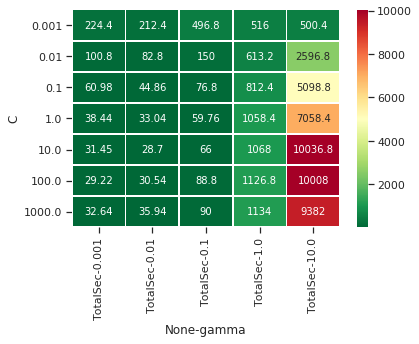

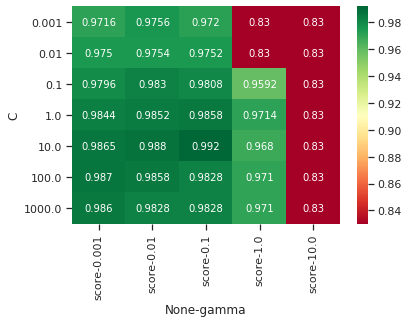

In [48]:
import seaborn as sns
%matplotlib inline

def aggregate(pf):
    return pf.groupby(["C", "gamma"]).mean().unstack()
# scores = svm_rbf[["C", "gamma", "TotalSec"]].groupby(["C", "gamma"]).mean().unstack()
# plt.figure()
sns.heatmap(aggregate(svm_rbf[["C", "gamma", "TotalSec"]]), cmap='RdYlGn_r', linewidths=0.5, annot=True, fmt='g')
plt.figure()
sns.heatmap(aggregate(svm_rbf[["C", "gamma", "score"]]), cmap='RdYlGn', annot=True, fmt='g')

In [52]:
svm_linear = pd.read_csv("SVM_evaluation_Linear.txt", sep=";")
# del svm_rbf["gamma.1"]
svm_linear["DeltaTime"] = pd.to_timedelta(svm_linear["total"])
svm_linear["TotalSec"] = svm_linear["DeltaTime"].apply(lambda x: x.total_seconds())
svm_linear

,C,kernel,score,total,DeltaTime,TotalSec
0,0.001,linear,0.988,43.8s,00:00:43.800000,43.8
1,0.001,linear,0.974,35.2s,00:00:35.200000,35.2
2,0.001,linear,0.992,44.8s,00:00:44.800000,44.8
3,0.010,linear,0.982,28.4s,00:00:28.400000,28.4
4,0.010,linear,0.989,34.3s,00:00:34.300000,34.3
5,0.100,linear,0.989,34.2s,00:00:34.200000,34.2
6,0.100,linear,0.978,25.0s,00:00:25,25.0
7,0.100,linear,0.995,36.2s,00:00:36.200000,36.2
8,1.000,linear,0.983,29.9s,00:00:29.900000,29.9
9,1.000,linear,0.992,39.7s,00:00:39.700000,39.7


In [61]:
svm_linear_avg = svm_linear[["C", "score", "TotalSec"]].groupby(["C"]).mean()
svm_linear_avg

,score,TotalSec
C,,
0.001,0.984200,40.74
0.010,0.986200,32.54
0.100,0.987200,31.12
1.000,0.987000,36.20
10.000,0.984250,54.65
100.000,0.986000,188.00
1000.000,0.984667,1392.00


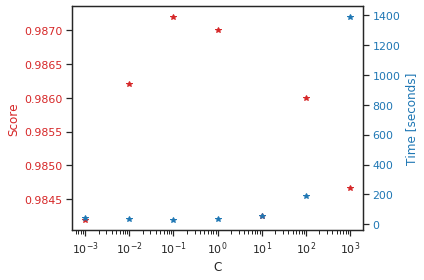

In [90]:
t = svm_linear_avg.index
score = svm_linear_avg["score"]
total_sec = svm_linear_avg["TotalSec"]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('C')
ax1.set_ylabel('Score', color=color)
ax1.semilogx(t, score, "*", color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Time [seconds]', color=color)  # we already handled the x-label with ax1
ax2.semilogx(t, total_sec, "*", color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped


## Logistic Regression

In [76]:
mean_score_time = [0.        , 0.01813335, 0.        , 0.01793513, 0.        ,
        0.01581621, 0.        , 0.01710491, 0.        , 0.02146401,
        0.        , 0.01705952, 0.        , 0.00933237]
mean_test_score = [       np.nan, 0.98308333,        np.nan, 0.98511667,        np.nan,
        0.98648333,        np.nan, 0.98683333,        np.nan, 0.98656667,
               np.nan, 0.9862    ,        np.nan, 0.98528333]
params = [{'C': 0.001, 'penalty': 'l1'}, 
  {'C': 0.001, 'penalty': 'l2'},
  {'C': 0.01, 'penalty': 'l1'},
  {'C': 0.01, 'penalty': 'l2'},
  {'C': 0.1, 'penalty': 'l1'},
  {'C': 0.1, 'penalty': 'l2'},
  {'C': 1, 'penalty': 'l1'},
  {'C': 1, 'penalty': 'l2'},
  {'C': 10, 'penalty': 'l1'},
  {'C': 10, 'penalty': 'l2'},
  {'C': 100, 'penalty': 'l1'},
  {'C': 100, 'penalty': 'l2'},
  {'C': 1000, 'penalty': 'l1'},
  {'C': 1000, 'penalty': 'l2'}]
params = [(0.001, 'l1'),
(0.001, 'l2'),
(0.01, 'l1'),
(0.01, 'l2'),
(0.1, 'l1'),
(0.1, 'l2'),
(1, 'l1'),
(1, 'l2'),
(10, 'l1'),
(10, 'l2'),
(100, 'l1'),
(100, 'l2'),
(1000, 'l1'),
(1000, 'l2')]

In [79]:
lr_avg_time = pd.DataFrame(mean_score_time, index=pd.MultiIndex.from_tuples(params, names=['C', 'Penalty'])).unstack()
lr_avg_time

0          
Penalty    l1        l2
C                      
0.001     0.0  0.018133
0.010     0.0  0.017935
0.100     0.0  0.015816
1.000     0.0  0.017105
10.000    0.0  0.021464
100.000   0.0  0.017060
1000.000  0.0  0.009332

In [78]:
lr_avg = pd.DataFrame(mean_test_score, index=pd.MultiIndex.from_tuples(params, names=['C', 'Penalty'])).unstack()
lr_avg

0          
Penalty   l1        l2
C                     
0.001    NaN  0.983083
0.010    NaN  0.985117
0.100    NaN  0.986483
1.000    NaN  0.986833
10.000   NaN  0.986567
100.000  NaN  0.986200
1000.000 NaN  0.985283

In [87]:
lr_avg_time[(0, 'l2')]

C
0.001       0.018133
0.010       0.017935
0.100       0.015816
1.000       0.017105
10.000      0.021464
100.000     0.017060
1000.000    0.009332
Name: (0, l2), dtype: float64

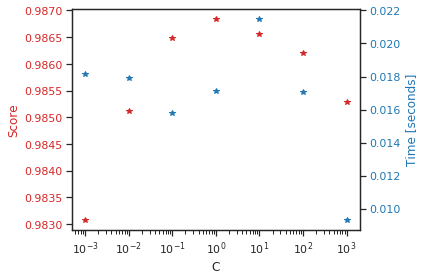

In [91]:
C = lr_avg.index
score = lr_avg[(0, 'l2')]
total_sec = lr_avg_time[(0, 'l2')]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('C')
ax1.set_ylabel('Score', color=color)
ax1.semilogx(C, score, "*", color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Time [seconds]', color=color)  # we already handled the x-label with ax1
ax2.semilogx(C, total_sec, "*", color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
